In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from find_shots import *

In [3]:
read_frames('./data/Friends-6x05.mp4')

Done till --  100
Done till --  200
Done till --  300
Done till --  400
Done till --  500
Done till --  600


In [3]:
def read_frame(frame_num):
    im = cv2.imread('./frames/frame'+str(frame_num)+'.jpg', cv2.IMREAD_UNCHANGED)
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    return im

In [35]:
shots = find_shots('../cv_timepass/frames') # dividing a video into several shots.

Done till --  100
Done till --  200
Done till --  300
Done till --  400
Done till --  500
Done till --  600
Done till --  700
Done till --  800
Done till --  900
Done till --  1000
Done till --  1100
Done till --  1200
Done till --  1300
Done till --  1400
Done till --  1500
Done till --  1600
Done till --  1700
Done till --  1800
Done till --  1900
Done till --  2000
Done till --  2100
Done till --  2200
Done till --  2300
Done till --  2400
Done till --  2500
Done till --  2600
Done till --  2700
Done till --  2800
Done till --  2900
Done till --  3000
Done till --  3100
Done till --  3200
Done till --  3300
Done till --  3400
Done till --  3500
Done till --  3600
Done till --  3700
Done till --  3800
Done till --  3900
Done till --  4000
Done till --  4100
Done till --  4200
Done till --  4300
Done till --  4400
Done till --  4500
Done till --  4600
Done till --  4700
Done till --  4800
Done till --  4900


In [54]:
len(shots[20])

38

In [57]:
ind = 60

In [79]:
shots[ind][0], shots[ind][-1]

(3637, 3725)

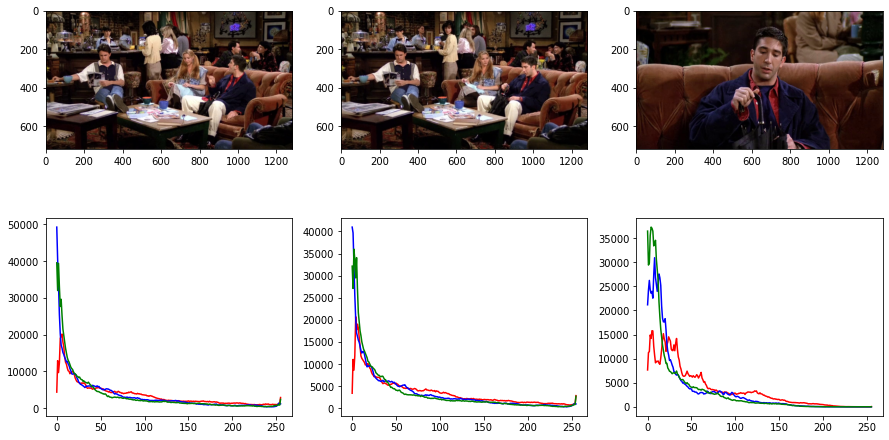

In [78]:
# showing first middle last frame of a shot
fig,ax = plt.subplots(2,3, figsize=(15,8))
ax[0][0].imshow(read_frame(shots[ind][0]))
ax[0][2].imshow(read_frame(shots[ind+1][0]))
ax[0][1].imshow(read_frame(shots[ind][-1]))

color = ('r','b','g')
for i,col in enumerate(color):
    histr = cv2.calcHist([read_frame(shots[ind][0])],[i],None,[256],[0,256])
    ax[1][0].plot(histr,color = col)
    histr = cv2.calcHist([read_frame(shots[ind+1][0])],[i],None,[256],[0,256])
    ax[1][2].plot(histr,color = col)
    histr = cv2.calcHist([read_frame(shots[ind][-1])],[i],None,[256],[0,256])
    ax[1][1].plot(histr,color = col)
    

In [58]:
from find_tracks import *

In [43]:
graph , lk_tracks, win_im = find_tracks(shots[ind][0], shots[ind][-1])

Found windows in all frames !
Done till here .
Done for :  3637
Done for :  3638
Done for :  3639
Done for :  3640
Done for :  3641
Done for :  3642
Done for :  3643
Done for :  3644
Done for :  3645
Done for :  3646
Done for :  3647
Done for :  3648
Done for :  3649
Done for :  3650
Done for :  3651
Done for :  3652
Done for :  3653
Done for :  3654
Done for :  3655
Done for :  3656
Done for :  3657
Done for :  3658
Done for :  3659
Done for :  3660
Done for :  3661
Done for :  3662
Done for :  3663
Done for :  3664
Done for :  3665
Done for :  3666
Done for :  3667
Done for :  3668
Done for :  3669
Done for :  3670
Done for :  3671
Done for :  3672
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Done for :  3673
Done for :  3674
Done for :  3675
Done for :  3676
Done for :  3677
Done for :  3678
Done for :  3679
Done for :  3680
Done for :  3681
Done for :  3682
Done for :  3683
Done for :  3684
Done for :  3685
Done for :  3686
Done for :  3687
Done for :  3688
Done for :  3689
Done for :  

In [44]:
graph

[([909, 277, 981, 349], [917, 269, 989, 341], 3704, 3710),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3710, 3711),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3711, 3712),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3712, 3713),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3713, 3714),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3714, 3718),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3718, 3719),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3719, 3720),
 ([917, 269, 989, 341], [917, 269, 989, 341], 3720, 3721)]

Correspondence between frame 3704 and 3710:


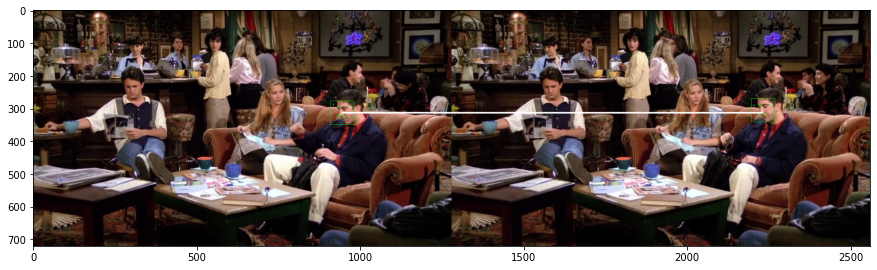

In [70]:
print('Correspondence between frame 3704 and 3710:')
im1 = win_im[3704-shots[ind][0]]
im2 = win_im[3721-shots[ind][0]]
mat = np.concatenate((im1, im2), axis=1)
fig, ax = plt.subplots(1, figsize=(15,12))
x = (graph[0][0][1]+graph[0][0][3])//2
for i in range((graph[0][0][0]+graph[0][0][2])//2, 1280+(graph[-1][1][0]+graph[-1][1][2])//2):
    mat[x][i] = np.array([255,255, 255])
    mat[x-1][i] = np.array([255,255, 255])
    mat[x+1][i] = np.array([255,255, 255])
    mat[x-2][i] = np.array([255,255, 255])
    mat[x+2][i] = np.array([255,255, 255])
    
plt.imshow(mat)

In [86]:
mat.shape

(720, 2560, 3)

In [80]:
# now because of correspondence graph I am know that the face should be detected in all 
# the frames between 3704 and 3710
# So the face was not detected in 3705th frame but by using our correspondence and lukas-kanade
# we can draw the face window in 3705th frame too.

Text(0.5, 1.0, 'Face window created using correspondences and LK tracks')

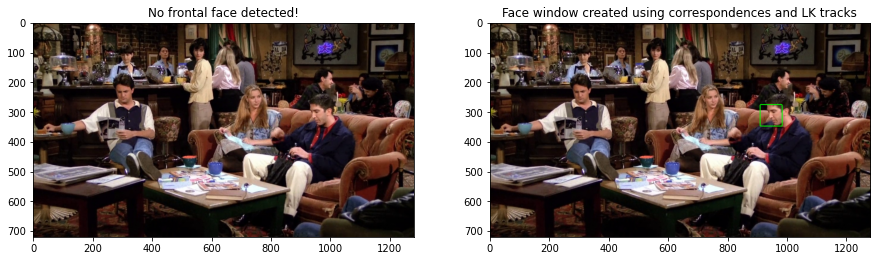

In [94]:
x1, y1, x2, y2 = graph[0][0][0], graph[0][0][1], graph[0][0][2], graph[0][0][3]
# print(x1,y1,x2,y2)
p1, p2 = lk_tracks[3704-shots[ind][0]][720*x1+y1], lk_tracks[3704-shots[ind][0]][720*x2+y2]
x1, y1, x2, y2 = int(p1[0]), int(p1[1]), int(p2[0]), int(p2[1])
# print(x1,y1,x2,y2)
im = read_frame(3705)
for i in range(y1,y2+1):
    im[i][x1] = np.array([0, 255, 0])
    im[i][x2] = np.array([0, 255, 0])
    im[i][x1-1] = np.array([0, 255, 0])
    im[i][x2+1] = np.array([0, 255, 0])
    im[i][x1-2] = np.array([0, 255, 0])
    im[i][x2+2] = np.array([0, 255, 0])
for i in range(x1,x2+1):
    im[y1][i] = np.array([0, 255, 0])
    im[y2][i] = np.array([0, 255, 0])
    im[y1-1][i] = np.array([0, 255, 0])
    im[y2+1][i] = np.array([0, 255, 0])
    im[y1-2][i] = np.array([0, 255, 0])
    im[y2+2][i] = np.array([0, 255, 0])

fig,ax = plt.subplots(1,2, figsize=(15,8))
ax[0].imshow(win_im[3705-shots[ind][0]])
ax[0].set_title('No frontal face detected!')
ax[1].imshow(im)
ax[1].set_title('Face window created using correspondences and LK tracks')

### Face identification using embeddings of siamese network

In [4]:
from imutils import paths
import face_recognition
import pickle
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [5]:
with open("encoding", "rb") as f:
    dict = pickle.load(f)
encoding_list = []
name_list = []
for key in dict.keys():
    for j in range(len(dict[key])):
        encoding_list.append(dict[key][j])
        name_list.append(key)

ross


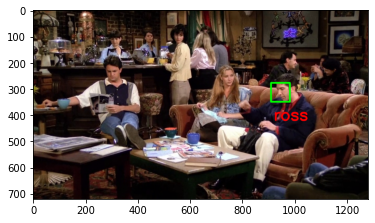

In [143]:
img1_rgb = cv2.imread("../cv_timepass/frames/frame3704.jpg")

# img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
#face = face_recognition.face_locations(img1_rgb, model="hog")
face = [(graph[0][0][1], graph[0][0][2], graph[0][0][3], graph[0][0][0])]
# print(face)
encod = face_recognition.face_encodings(img1_rgb, face)
img_b = np.copy(img1_rgb)
yo = 0
for encoding in encod:
    match = face_recognition.compare_faces(encoding_list, encoding)
    name ="unk"
    if True in match:
        match_i = [i for (i, b) in enumerate(match) if b]
        count = {}
        for i in match_i:
            name = name_list[i]
            if name not in count.keys():
                count[name] = 0
            count[name] += 1
        name = max(count, key=count.get)
    img_b = cv2.putText(img_b, name, (face[yo][3] +10,face[yo][2]+70), 0, 2, 255,5)
    img_b = cv2.rectangle(img_b, (face[yo][3] , face[yo][2] ), (face[yo][1] , face[yo][0] ), (0, 255, 0), 5)
    yo+=1
plt.imshow(img_b)

print(name)

### making a complete video

In [6]:
shots = find_shots('./frames')

Done till --  100
Done till --  200
Done till --  300
Done till --  400
Done till --  500


In [7]:
def find(frame_num):
#     print("./frames/frame"+str(frame_num)+".jpg")
    img1_rgb = cv2.imread("./frames/frame"+str(frame_num)+".jpg")
#     print(img1_rgb.shape)
# img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    face = face_recognition.face_locations(img1_rgb, model="hog")
#face = [(graph[0][0][1], graph[0][0][2], graph[0][0][3], graph[0][0][0])]
# print(face)
    encod = face_recognition.face_encodings(img1_rgb, face)
    img_b = np.copy(img1_rgb)
    yo = 0
    for encoding in encod:
        match = face_recognition.compare_faces(encoding_list, encoding)
        name ="unk"
        if True in match:
            match_i = [i for (i, b) in enumerate(match) if b]
            count = {}
            for i in match_i:
                name = name_list[i]
                if name not in count.keys():
                    count[name] = 0
                count[name] += 1
            count
            name = max(count, key=count.get)
        img_b = cv2.putText(img_b, name, (face[yo][3] +10,face[yo][2]+70), 0, 2, 255,5)
        img_b = cv2.rectangle(img_b, (face[yo][3] , face[yo][2] ), (face[yo][1] , face[yo][0] ), (0, 255, 0), 5)
        yo+=1
    return img_b



In [5]:
import dlib

descriptors_dict = {}
detector = dlib.get_frontal_face_detector()
sift = cv2.xfeatures2d.SIFT_create()

def find_sift(frame_num):
    img = cv2.imread("./frames/frame4200.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = detector(gray)
    mask = np.zeros(gray.shape, dtype="uint8")
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    descriptors_1 = None
    fl = 0
    for face in faces:
        fl = 1
        x1 = face.left() # left point
        y1 = face.top() # top point
        x2 = face.right() # right point
        y2 = face.bottom() # bottom point
        for i in range(mask.shape[0]):
            for j in range(mask.shape[1]):
                if i > y1 and i < y2 and j > x1 and j < x2:
                    mask[i][j] = 1
        keypoints_1, descriptors_1 = sift.detectAndCompute(gray,mask=mask)
        value = 0
        name = None
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        scores = []
        for key in descriptors_dict.keys():
            for descriptors in descriptors_dict[key]:
                matches = bf.match(descriptors_1,descriptors)
                new_value = len(matches)/descriptors.shape[0] 
                scores.append([len(matches), key])
                if value < new_value:
                    value = new_value
                    name = key
        scores.sort(key=lambda y:y[0], reverse=True)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [9]:
out = []
for i in range(1,2):
    out.append(find(i))
    print(i)

1


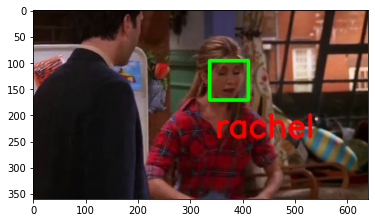

In [26]:
plt.imshow(out[100])

In [29]:
# print(len(out))
height, width, layers = out[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('output_video.avi',fourcc, 10, (width, height))
for i in range(len(out)):
    video.write(cv2.cvtColor(out[i], cv2.COLOR_BGR2RGB))

In [27]:
!mkdir output_frames

### eigen faces face classification

In [52]:
import os
data = {}
names = ['chandler', 'joey' , 'monica' , 'phoebe' , 'rachel' , 'ross']
names_id = {'chandler':0, 'joey':1 , 'monica':2 , 'phoebe':3 , 'rachel':4 , 'ross':5}
for i in names:
    pa = './Friends/Train/'+i+'/'
    fi = [f for f in os.listdir(pa)]
    li = []
    for f in fi:
        if f[-3:] == 'gif':
            continue
        im = cv2.imread(pa+f, cv2.IMREAD_UNCHANGED)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        if im.shape[2]!=3:
            continue
#         print(im.shape)
        im = cv2.resize(im, (32, 32), cv2.INTER_CUBIC)
        im = im.reshape((-1)).astype('float')/255.0
#         print(im.shape)
        li.append(im)
    li = np.array(li)
    data[i] = li

In [53]:
def covariance_matrix(X):
    n = len(X)
    H = np.ones((n,n),dtype='float64')/(-n)
    for i in range(n):
        H[i][i]+=1.0
    hx = np.dot(H,X)
    covar = np.dot(hx.T, hx)/n
    return covar

def eigen(X):
    w,v = np.linalg.eigh(X)
    eig_vec = []
    w = np.absolute(w)
    for i in range(len(v)):
        eig_vec.append([w[i],v[i]])
    return eig_vec

In [54]:
eig = {}
for name in names:
# eigen values and spectrum
    eig_vec = eigen(np.cov(data[name].T))
# eig_vec[0][0],eig_vec[0][1]
    eig_vec.sort(reverse=True, key = lambda x: x[0])
    eig_vec = np.array(eig_vec)
    for i in range(len(eig_vec)):
        eig_vec[i][1] /= np.sum(eig_vec[i][1]**2)**0.5
    eig[name] = eig_vec

/home/priyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [55]:
eig['chandler'][0][1].shape

(3072,)

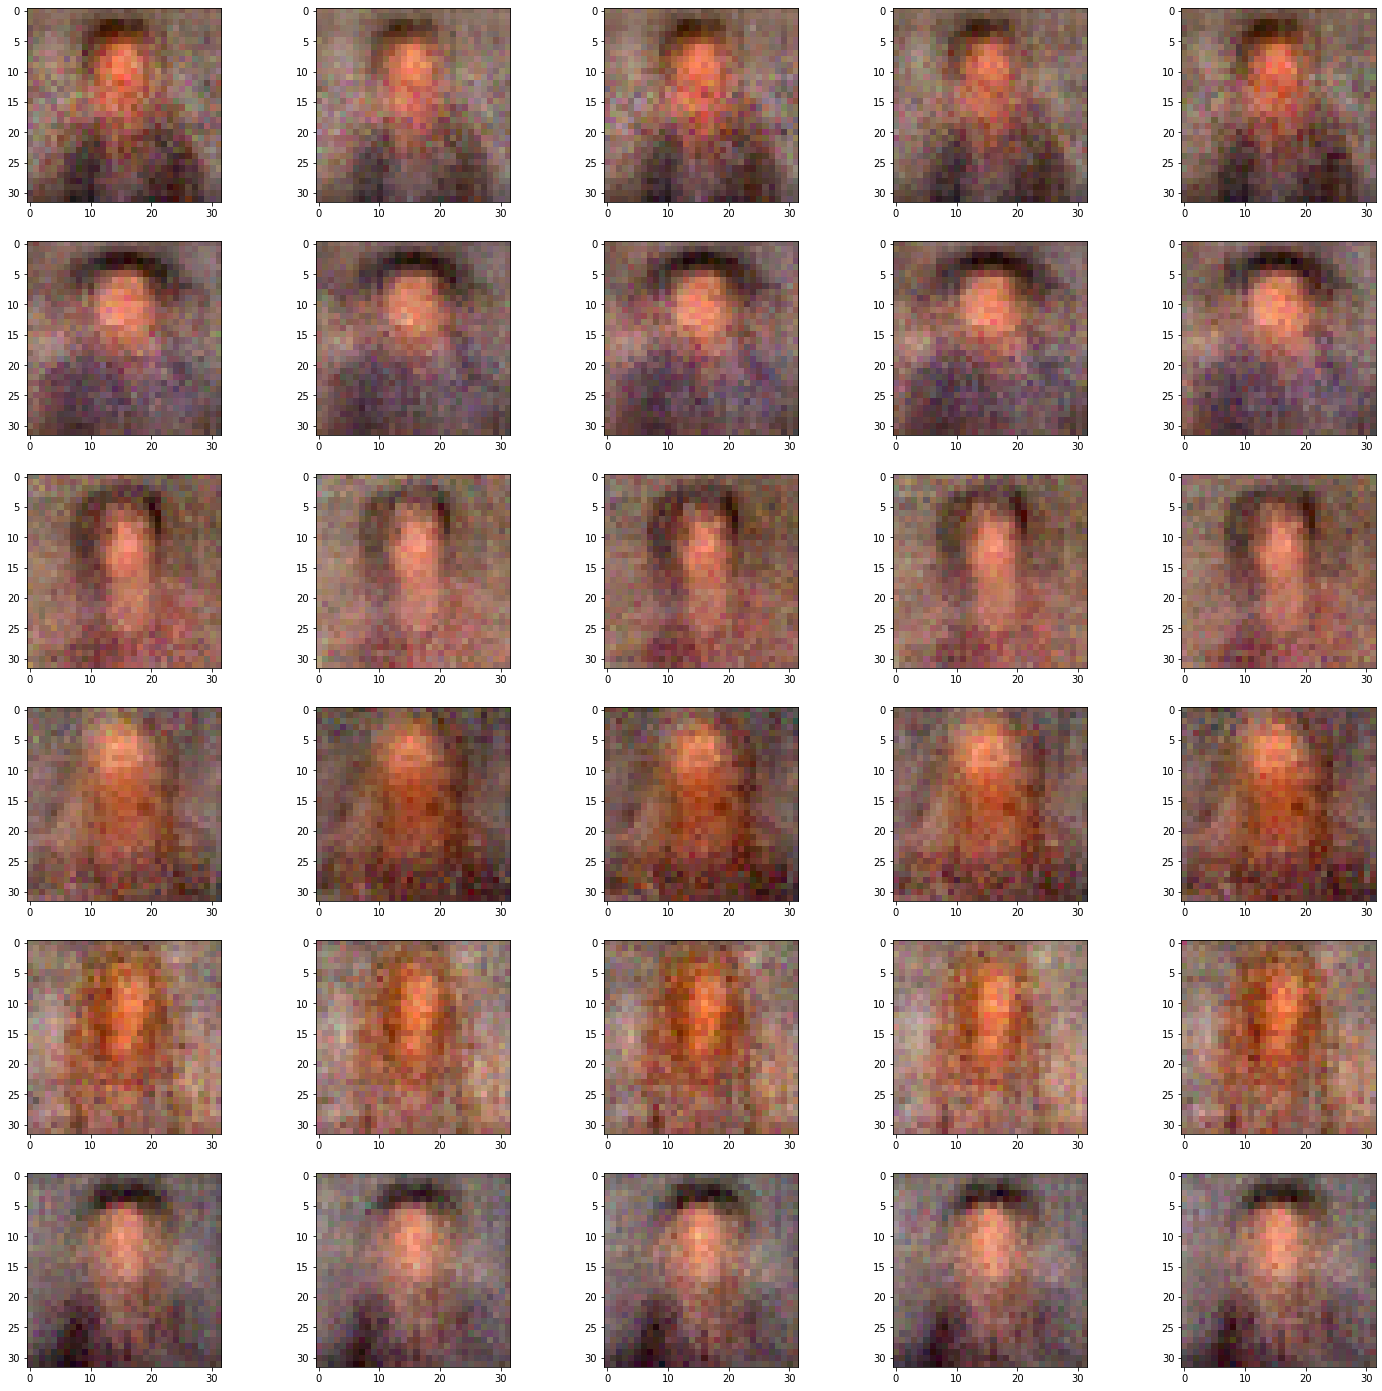

In [56]:
fig, ax = plt.subplots(6,5,figsize=(25,25))
# eig = dict()
mean_class = {}
for cel in names:
    dimen = 200
    eig_vec = np.zeros((dimen,3072))
#     eig[cel] = eigen(covariance_matrix(x_class[cel]))
#     eig[cel].sort(reverse=True, key = lambda x: x[0])

    for i in range(dimen):
        eig_vec[i] = eig[cel][i][1]
    mean_x = np.zeros(3072)
    for i in range(len(data[cel])):
        mean_x+=data[cel][i]
    mean_x/=len(data[cel])
    mean_class[cel] = mean_x
    
    for i in range(5):
        im = eig_vec[i]+mean_x
        minim = np.min(im)
        maxim = np.max(im)
        im = (im - minim) / (maxim - minim)
        im = np.clip(im,0,1)
        im = im.reshape((32,32,3))
        ax[names_id[cel]][i].imshow(im)

In [59]:
win, im1 = find_windows('./frames/frame100.jpg')

In [62]:
def reconstruct(image, eig_vec, dim):
#     fig, ax = plt.subplots(5,5,figsize=(25,25))
#     for i in range(25,50):
    pl = image
    out = np.dot(eig_vec.T,pl)+mean_x
#         out *= 255.0
    minim = np.min(out)
    maxim = np.max(out)
    out = (out - minim) / (maxim - minim)
#         print(len(out))
#         out = out.astype('uint8')
    out = out.reshape((32,32,3))
#         print(out[0][0])
    out = np.clip(out,0,1)
#     ax[i//5-5][i%5].imshow(out,cmap=plt.cm.gray)
    return out

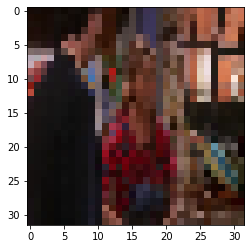

In [64]:
im = read_frame(100)
im = cv2.resize(im, (32,32), cv2.INTER_CUBIC)
plt.imshow(im)